# Lab 1: Introduction to data visualization with Python


In this lab, you will learn how to use the Python programming language to represent data over space and time. 
The first item of business is to understand the basic Python stack we will be using in this course. It is sometimes known as Scientific Python, and consists of the following elements:
- NumPy, a collection of array-based data types and functions to manipulate them
- SciPy, which builds on NumPy and incorporates a lot of commonly used methods of science and engineering
- Pandas, a powerful data analysis toolkit for tabular / matrix datasets
- Matplotlib, a graphics library that emulates Matlab plotting (but better).

The preamble of any Python document always loads the relevant packages, often assigning them to a moniker (e.g. NumPy --> np). The last command ensures that the plots appear where they should

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline  

## Timeseries Data

### Displaying Timeseries Data

To illustrate how to deal with timeseries data (=data whose order matters), let's look at the global, annually-averaged temperature anomalies relative to 1961-1990 fron the HadCRUT4 dataset. Let's read the data using read_csv Pandas function, which is very handy. However, we need to specify that the delimiter of this file is whitespace, otherwise the function wouldn't know where to separate values. 

In [2]:
df=pd.read_csv('HadCRUT.4.6.0.0.annual_ns_avg.txt',delim_whitespace=True,header=None)

Let's see the structure of this temperature dataset. The explanation of this data format can be found in https://www.metoffice.gov.uk/hadobs/hadcrut4/data/current/series_format.html. Column 0 is year; Column 1 is the median temperature; Column 10 and 11 are the lower and upper bounds of the 95% confidence interval, representing the combined effects of all the uncertainties described in the HadCRUT4 error model.

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,1850,-0.373,-0.425,-0.339,-0.502,-0.243,-0.536,-0.210,-0.515,-0.238,-0.591,-0.162
1,1851,-0.218,-0.274,-0.184,-0.350,-0.086,-0.368,-0.068,-0.365,-0.081,-0.429,-0.016
2,1852,-0.228,-0.280,-0.196,-0.353,-0.103,-0.378,-0.078,-0.367,-0.098,-0.434,-0.030
3,1853,-0.269,-0.321,-0.239,-0.378,-0.160,-0.428,-0.110,-0.393,-0.155,-0.472,-0.075
4,1854,-0.248,-0.301,-0.218,-0.349,-0.147,-0.391,-0.105,-0.365,-0.143,-0.435,-0.072
5,1855,-0.272,-0.324,-0.241,-0.369,-0.176,-0.415,-0.130,-0.385,-0.171,-0.455,-0.099
6,1856,-0.358,-0.413,-0.327,-0.456,-0.260,-0.501,-0.215,-0.471,-0.253,-0.541,-0.182
7,1857,-0.461,-0.512,-0.431,-0.558,-0.363,-0.594,-0.328,-0.573,-0.358,-0.636,-0.294
8,1858,-0.467,-0.521,-0.435,-0.570,-0.364,-0.600,-0.334,-0.583,-0.357,-0.644,-0.295
9,1859,-0.284,-0.340,-0.249,-0.396,-0.171,-0.418,-0.150,-0.412,-0.166,-0.470,-0.106


Let's plot this series. We will plot the median temperature and the 95% confidence interval of temperature.

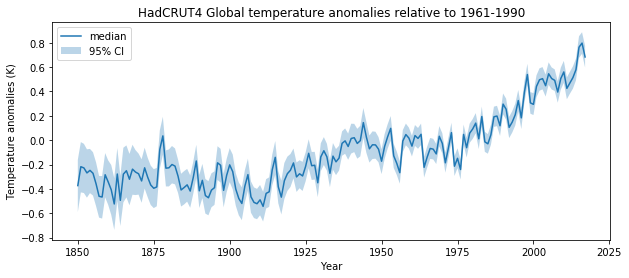

In [4]:
plt.figure(figsize=(10,4))
plt.plot(df[0],df[1],label='median')
plt.fill_between(df[0], df[10], df[11],lw=0.0,label='95% CI',alpha=0.3)
plt.xlabel('Year')
plt.ylabel('Temperature anomalies (K)')
plt.title('HadCRUT4 Global temperature anomalies relative to 1961-1990')
plt.legend()
plt.savefig('temperature_HadCRUT_defaultstyle.pdf')

It must be said that Matplotlib defaults are pretty ugly. Luckily, there is a whole library of style you can play with, which will change the look & feel of your plots in one stroke.  For instance, this is an emulation of the famous Grammar of Graphics library (ggplot):

In [63]:
print(plt.style.available)  # list all styles available

['_classic_test', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'jeg', 'paper', 'presentation']


**Question 1:** Label the axes and play with the various  Matplotlib styles to find what you like. Export at least 3 different ones to a pdf file. 

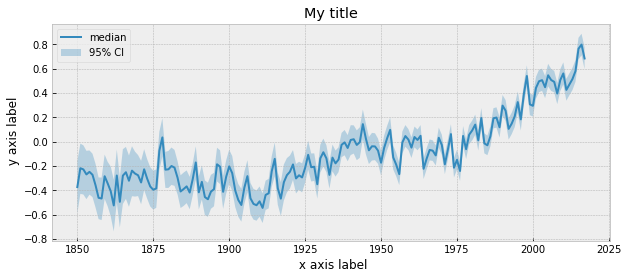

In [5]:
plt.style.use('bmh')  #replace by style of your choice
plt.figure(figsize=(10,4))
plt.plot(df[0],df[1],label='median')
plt.fill_between(df[0], df[10], df[11],lw=0.0,label='95% CI',alpha=0.3)
plt.xlabel(' x axis label')
plt.ylabel(' y axis label')
plt.title('My title')
plt.legend()
plt.savefig('temperature_HadCRUT_mystyle.pdf')

### Straight line fits

Often we are interested in quantifying trends in timeseries data. One way to do this is to add a straight line fit (if you want to be technical: an ordinary least squares regression) through the data. Let's do this over several intervals to illustrate another nifty programming trick: loops.

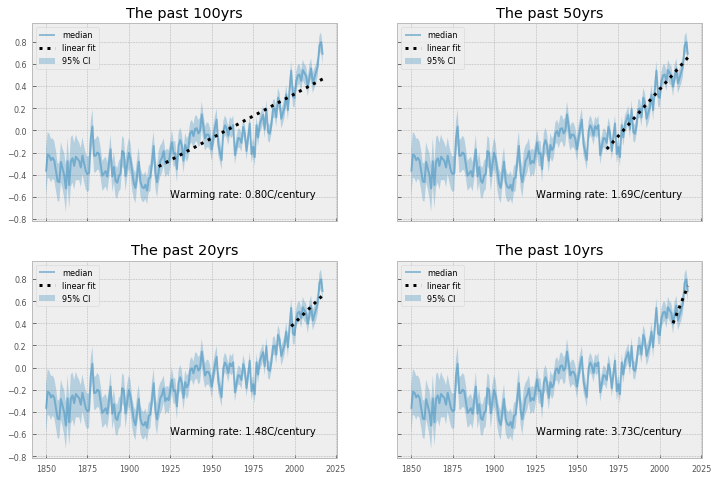

In [66]:
block = [100, 50, 20, 10]  # define block lengths 
f, ax = plt.subplots(2,2,figsize=(12,8),sharex=True,sharey=True) # declare 4 panel figure
ax = ax.ravel() 

for i in range(len(block)):
    t = df[0].values[-block[i]:]
    X = np.vander(t, 2) # set up design matrix with 1, t as predictors
    y = df[1].values[-block[i]:]
    import statsmodels.api as sm
    lin_mdl = sm.OLS(y, X).fit()
    trend = lin_mdl.predict(X)
    slope = lin_mdl.params[0]
    #print()

    ax[i].plot(df[0],df[1],label='median',alpha=0.5)
    ax[i].plot(t,trend,'k:',label='linear fit',lw=3.0)
    ax[i].fill_between(df[0], df[10], df[11],lw=0.0,label='95% CI',alpha=0.3)
    ax[i].legend()
    ax[i].set_title('The past '+str(block[i])+'yrs')
    slope_str = '{:3.2f}'.format(slope*100)
    ax[i].text(1925,-0.6,"Warming rate: " + slope_str + "C/century")

## Spatial data

This is a very basic introduction to spatial data. We will use the Basemap package to plot data on maps. Let's load it first.

In [67]:
from mpl_toolkits.basemap import Basemap,shiftgrid

While the Earth is obviously a 3-dimensional object (close to a sphere), paper and screens are 2-dimensional. Thus we need to project the Earth's surface onto a plane. There are many ways to do this, and they all involve a trade-off: when you lose a dimension, you cannot represent distances, shaped and/or areas faithfully. Thus, the choice of projection depends on what you want to emphasize.

We will explore different projections, and quantify distortion by way of Tissot's "indicatrices". Imagined by Nicolas A. Tissot in 1871, these are infinitesimally small circles centered on some point on the surface of the Earth, whose shape and area is considered after transformed by a given map projection. In an ideal world, these symbols should be circles, but they get flattened to footballs ("ellipses") when distortion is large. They will appear as green symbols on the maps below.

### Equidistant Cylindrical Projection

As its name implies, this projection preserves distances. It is a cylindrical projection with standard meridians: all have constant scale, equal to the standard parallels's, therefore all parallels are equally spaced. It was credited to Erathostenes (ca. 200 b.c.) and to Marinus of Tyre (ca. 100). Its trivial construction made it widely used, even for navigation, until the Modern Age.

Text(0.5,1,'Equidistant Cylindrical Projection')

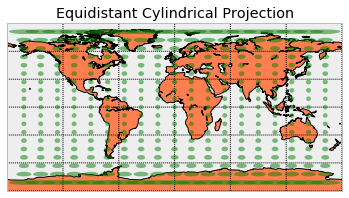

In [68]:
# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# resolution = 'c' means use crude resolution coastlines.
m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,llcrnrlon=-180,urcrnrlon=180,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='coral')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))
#m.drawmapboundary(fill_color='aqua')

# draw tissot's indicatrix to show distortion.
for y in np.linspace(-9*m.ymax/10,9*m.ymax/10,19):
    for x in np.linspace(-9*m.xmax/10,9*m.xmax/10,19):
        lon, lat = m(x,y,inverse=True)
        poly = m.tissot(lon,lat,2.5,100,\
                        facecolor='green',zorder=10,alpha=0.5)
        
plt.title("Equidistant Cylindrical Projection")

**Question 2**: Where is distortion most intense?

**Answer 2**:

Let us now try the Mollweide projection

### Mollweide Projection


Created by the German Karl B. Mollweide, this projection is bounded by an ellipse; poles are points and its Equator is twice as long as the straight central meridian, but neither is a standard line. All other meridians are elliptical arcs, and parallels are unequally spaced in order to preserve areas. Only the intersections of the central meridian with the standard parallels 40°44'12"N and S are free of distortion. Even though its geometry is easily deduced, calculation is more complex than for the other classic pseudocylindrical still important today, the sinusoidal — this and the loss of uniform scale along the central meridian are the price paid for lesser crowding in polar areas.

See http://www.progonos.com/furuti/MapProj/Dither/ProjPCyl/projPCyl.html for details.

/Users/julieneg/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


Text(0.5,1,'Mollweide Projection')

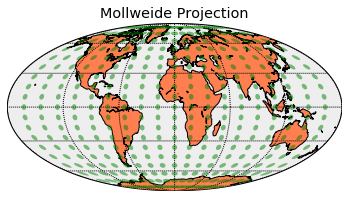

In [69]:
m = Basemap(projection='moll',lon_0=0,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='coral')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,420.,60.))
#m.drawmapboundary(fill_color='aqua')

# draw tissot's indicatrix to show distortion.
for y in np.linspace(-9*90./10,9*90./10,19):
    for x in np.linspace(-9*180./10,9*180./10,19):
        #lon, lat = m(x,y,inverse=True)
        poly = m.tissot(x,y,2.5,100,\
                        facecolor='green',zorder=10,alpha=0.5)
        
plt.title("Mollweide Projection")

**Question 3**: Contrast this projection with the Equidistant Cylindrical one.

**Answer 3**:

### Robinson Projection

Robinson makes the world “look right”. Better balance of size and shape of high-latitude lands than in Mollweide. Russia, Canada, and Greenland truer to size, but Greenland compressed. Directions true along all parallels and along central meridian. Distances constant along the equator and other parallels, but scales vary. All points have some distortion but it is very low along the equator and within 45° of centre. Distortion greatest near the poles. Not an equal-area projection

/Users/julieneg/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


Text(0.5,1,'Robinson Projection')

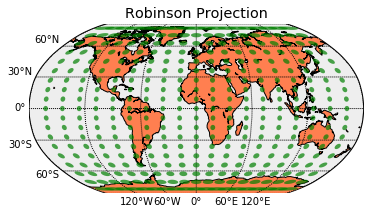

In [70]:
m = Basemap(projection='robin',lat_0=0, lon_0=0,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='coral')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.),labels=[1,0,0,0])
m.drawmeridians(np.arange(0.,361.,60.),labels=[0,0,0,1])
#m.drawmapboundary(fill_color='aqua')

# draw tissot's indicatrix to show distortion.
for y in np.linspace(-9*90./10,9*90./10,19):
    for x in np.linspace(-9*180./10,9*180./10,19):
        poly = m.tissot(x,y,2.5,100,\
                        facecolor='green',zorder=10,alpha=0.7)
        
plt.title("Robinson Projection")

### Polar projections

Finally, we can choose to view the Earth over the poles. 
This projection is provided under two names, as the Polar Stereographic form illustrated above for polar aspect and also as the Stereographic projection. It is an azimuthal, conformal, polyconic (general) perspective projection. 
Scale is true only where the central latitude crosses the central meridian or, alternatively, along parallel. Scale is constant along any circle having its center at the projection center, but scale increases moderately with distance from the center within a hemisphere. Only the center or the circle of true scale (if not the center) is free from all distortion. Areas grow greater the farther from the center, albeit in a conformal manner. This proection is commonly used in the polar aspect for topographic maps of polar regions. 
  
Under no circumstance should it be used to map the entire world’s surface at once: at least the point directly opposite to the projection origin must be excluded. This limitation arises because the Stereographic projections map the point opposite the projection origin to infinity, causing numeric mayhem. For example, if the North Pole is used as the projection origin, the South Pole and region immediately about the South Pole should not be included in the map.

Text(0.5,1,'North Polar Stereographic Projection')

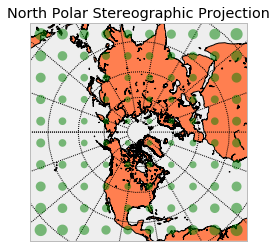

In [71]:
# setup north polar stereographic basemap.
# The longitude lon_0 is at 6-o'clock, and the
# latitude circle boundinglat is tangent to the edge
# of the map at lon_0. Default value of lat_ts
# (latitude of true scale) is pole.
m = Basemap(projection='npstere',boundinglat=10,lon_0=270,resolution='l')
m.drawcoastlines()
m.fillcontinents(color='coral')
# draw parallels and meridians.
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
#m.drawmapboundary(fill_color='aqua')
# draw tissot's indicatrix to show distortion.
#ax = plt.gca()
for y in np.linspace(m.ymax/20,19*m.ymax/20,10):
    for x in np.linspace(m.xmax/20,19*m.xmax/20,10):
        lon, lat = m(x,y,inverse=True)
        poly = m.tissot(lon,lat,2.5,100,\
                        facecolor='green',zorder=10,alpha=0.5)
plt.title("North Polar Stereographic Projection")

**Question 4:** Which projections enlarge the polar regions? Which projections enlarge the tropical regions?

**Answer 4**:

Now let's try plot data on maps. Many gridded climate data are in the format of NetCDF. We will use the xarray package to read a NetCDF file containing near-surface climatological temperature, wind velocities, and temperature anomaly in Dec, 2017.  

In [77]:
# Load the xarray package
import xarray as xr

In [73]:
# open the NetCDF data by xarray
ds = xr.open_dataset('clim_ltm.nc')

Look at the variables in the file clim_ltm.nc

In [74]:
ds

<xarray.Dataset>
Dimensions:       (lat: 73, lon: 144)
Coordinates:
  * lon           (lon) float32 0.0 2.5 5.0 7.5 10.0 12.5 15.0 17.5 20.0 ...
  * lat           (lat) float32 90.0 87.5 85.0 82.5 80.0 77.5 75.0 72.5 70.0 ...
Data variables:
    T_clim        (lat, lon) float64 ...
    U_clim        (lat, lon) float64 ...
    V_clim        (lat, lon) float64 ...
    T_ano_201712  (lat, lon) float64 ...

- T_clim: climatological temperature
- U_clim: climatological zonal wind
- V_clim: climatological meridional wind
- T_ano_201712: temperature anomalies in Dec 2017

In [78]:
# read latitude and longitude
lat=ds.lat
lon=ds.lon

In [79]:
# read climatological temperature, u-wind, v-wind
T_clim = ds.T_clim
U_clim = ds.U_clim
V_clim = ds.V_clim

# read temperature anomaly in Dec 2017
T_ano = ds.T_ano_201712

You can quickly view the content of a variable by .plot()

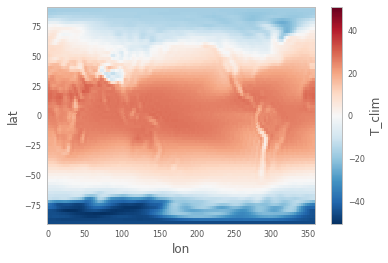

In [80]:
T_clim.plot()

Now let's plot the temperature data on a map with coastlines and the Robinson projection

/Users/julieneg/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


Text(0.5,1,'Climatological temperature ($^{\\circ}$C)')

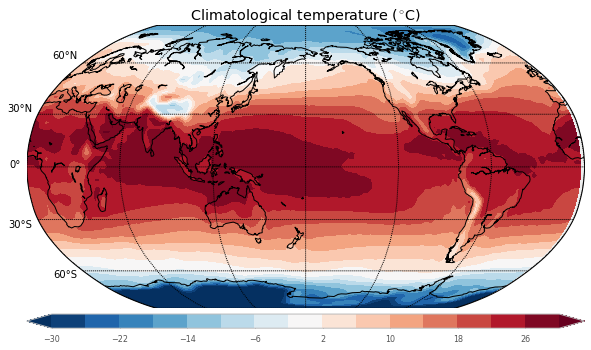

In [82]:
plt.figure(figsize=(10,8))
m = Basemap(projection='robin',lat_0=0, lon_0=180,resolution='c')
m.drawcoastlines()
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.),labels=[1,0,0,0])
m.drawmeridians(np.arange(0.,361.,60.),labels=[0,0,0,1])

lons, lats = np.meshgrid(ds.lon.values, ds.lat.values)
x1,y1 = m(lons, lats)
clevs=np.linspace(-30,30,16)
cs=m.contourf(x1,y1,T_clim,clevs,cmap=plt.cm.RdBu_r,extend='both')
cbar = m.colorbar(cs,location='bottom')
plt.title(r'Climatological temperature ($^{\circ}$C)')

Plot temperature anomalies in Dec 2017. A temperature anomaly is the difference from an average, or baseline, temperature. The baseline temperature is typically computed by averaging 30 or more years of temperature data. A positive anomaly indicates the observed temperature was warmer than the baseline, while a negative anomaly indicates the observed temperature was cooler than the baseline.

/Users/julieneg/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


Global mean anomaly:  0.8217604183729829


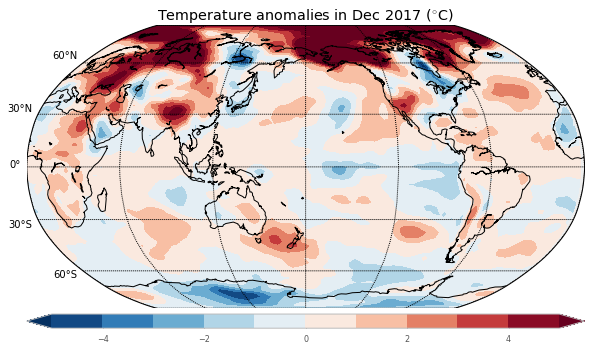

In [84]:
plt.figure(figsize=(10,8))
m = Basemap(projection='robin',lat_0=0, lon_0=180,resolution='c')
m.drawcoastlines()
#m.fillcontinents()
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.),labels=[1,0,0,0])
m.drawmeridians(np.arange(0.,361.,60.),labels=[0,0,0,1])
#m.drawmapboundary(fill_color='aqua')
lons, lats = np.meshgrid(ds.lon.values, ds.lat.values)
x1,y1 = m(lons, lats)
clevs=np.linspace(-5,5,11)
cs=m.contourf(x1,y1,T_ano,clevs,cmap=plt.cm.RdBu_r,extend='both')
cbar = m.colorbar(cs,location='bottom')
plt.title(r'Temperature anomalies in Dec 2017 ($^{\circ}$C)')

# Global mean anomaly
print('Global mean anomaly: ',T_ano.mean(dim=['lat','lon']).values)

**Question 5a**: Which regions are warmer than the normal condition? Which regions are cooler?

**Answer 5a**:

**Question 5b**: What is the global mean of the anomaly? Is it truthful to say that because the US Northeast was cold that month, it wasn't warm in other places?

**Answer 5b**:

### Plot near-surface wind together with temperature

/Users/julieneg/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


Text(0.5,1,'Near-surface temperature ($^{\\circ}$C) and wind (m/s)')

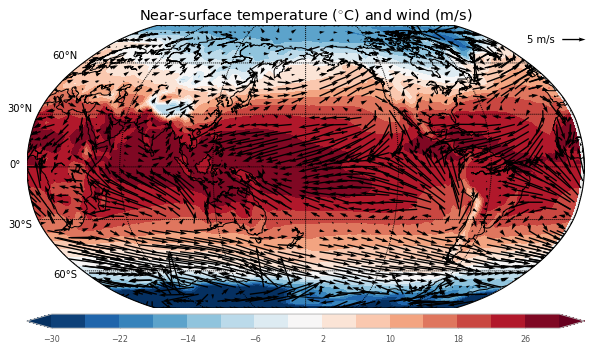

In [87]:
plt.figure(figsize=(10,8))
m = Basemap(projection='robin',lat_0=0, lon_0=180,resolution='c')
m.drawcoastlines()
#m.fillcontinents()
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.),labels=[1,0,0,0])
m.drawmeridians(np.arange(0.,361.,60.),labels=[0,0,0,1])
#m.drawmapboundary(fill_color='aqua')
lons, lats = np.meshgrid(ds.lon.values, ds.lat.values)
x1,y1 = m(lons, lats)
clevs=np.linspace(-30,30,16)
cs=m.contourf(x1,y1,T_clim,clevs,cmap=plt.cm.RdBu_r,extend='both')
cbar = m.colorbar(cs,location='bottom')

ugrid,newlons = shiftgrid(180.,U_clim[::-1,:],ds.lon.values,start=False)
vgrid,newlons = shiftgrid(180.,V_clim[::-1,:],ds.lon.values,start=False)
uproj,vproj,xu,yu = m.transform_vector(ugrid,vgrid,newlons,ds.lat.values[::-1], 41,41,returnxy=True,masked=True)
# now plot.
Q = m.quiver(xu,yu,uproj,vproj,scale=120)
qk = plt.quiverkey(Q, 0.96, 0.95, 5, '5 m/s', labelpos='W')
plt.title(r'Near-surface temperature ($^{\circ}$C) and wind (m/s)')

**Question 6**: What is the climatological near-surface wind direction over California?

**Answer 6**:

## Colormaps

As you have seen, we used a Red-Blue colormap to plot the global temperature. Python also provides other colormaps to plot figures. There are two main categories, sequential colormaps, and diverging colormaps. Sequential colormaps are often used when the plotted variable has the same sign, and diverging colormaps are for variables which have both positive and negative values, symmetric to zero. Please run the following code to see the colormaps provided by the matplotlib package.

We need to be careful when choosing colormaps, because sometimes an inappropriate colormap can mislead the information in the plot.

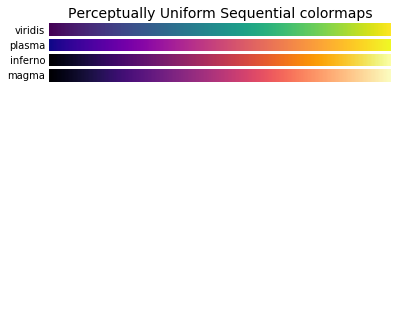

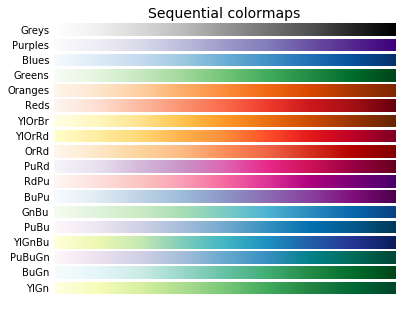

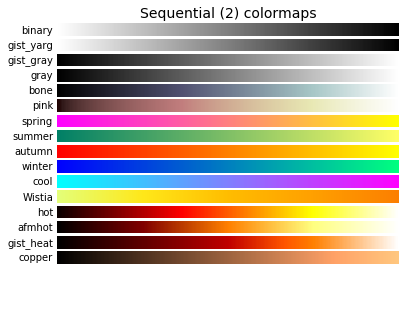

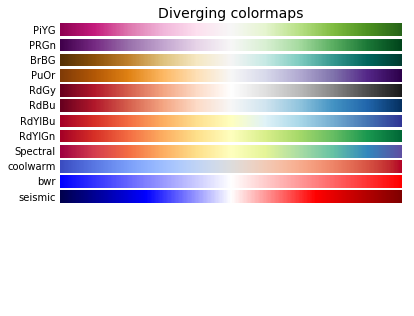

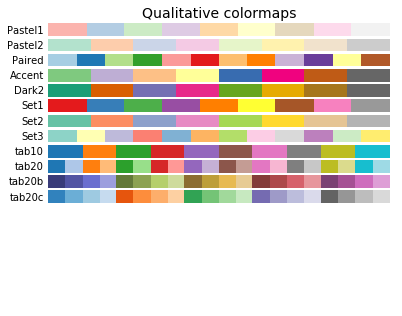

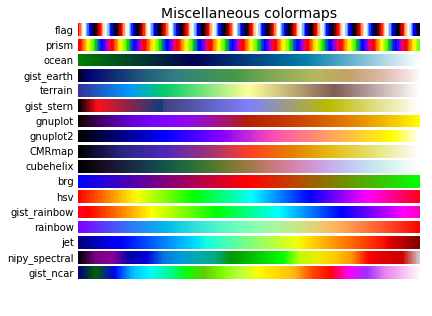

In [88]:
# Have colormaps separated into categories:
# http://matplotlib.org/examples/color/colormaps_reference.html
cmaps = [('Perceptually Uniform Sequential', [
            'viridis', 'plasma', 'inferno', 'magma']),
         ('Sequential', [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']),
         ('Sequential (2)', [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']),
         ('Diverging', [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']),
         ('Qualitative', [
            'Pastel1', 'Pastel2', 'Paired', 'Accent',
            'Dark2', 'Set1', 'Set2', 'Set3',
            'tab10', 'tab20', 'tab20b', 'tab20c']),
         ('Miscellaneous', [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg', 'hsv',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'])]


nrows = max(len(cmap_list) for cmap_category, cmap_list in cmaps)
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(cmap_category, cmap_list, nrows):
    fig, axes = plt.subplots(nrows=nrows)
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
    axes[0].set_title(cmap_category + ' colormaps', fontsize=14)

    for ax, name in zip(axes, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes:
        ax.set_axis_off()


for cmap_category, cmap_list in cmaps:
    plot_color_gradients(cmap_category, cmap_list, nrows)

Let's replot the temperature anomaly in Dec 2017 by another colormap, "jet".

/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


Text(0.5,1,'Temperature anomalies in Dec 2017 ($^{\\circ}$C)')

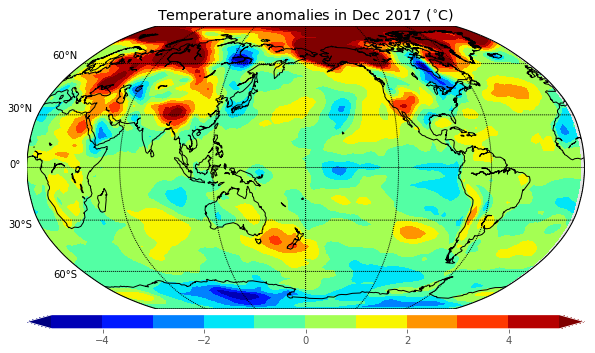

In [148]:
plt.figure(figsize=(10,8))
m = Basemap(projection='robin',lat_0=0, lon_0=180,resolution='c')
m.drawcoastlines()
#m.fillcontinents()
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.),labels=[1,0,0,0])
m.drawmeridians(np.arange(0.,361.,60.),labels=[0,0,0,1])
#m.drawmapboundary(fill_color='aqua')
lons, lats = np.meshgrid(ds.lon.values, ds.lat.values)
x1,y1 = m(lons, lats)
clevs=np.linspace(-5,5,11)
cs=m.contourf(x1,y1,T_ano,clevs,cmap=plt.cm.jet,extend='both')
cbar = m.colorbar(cs,location='bottom')
plt.title(r'Temperature anomalies in Dec 2017 ($^{\circ}$C)')

**Question 7**: Does this plot give you a different impression comparing with the previous plot? If so, what is different?

**Answer 7**:

**Question 8**: Try two other colormap, and discuss the results.